In [2]:
import os
import pandas as pd
# import IPython.display as ipd
# import librosa
# import librosa.display
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob
import json

In [3]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']

semitons = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [4]:
data = pd.read_csv('../corpus/generated_chords/chromas.csv')
data.set_index('Unnamed: 0', inplace=True)
data.head()

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B,true
Unnamed: 0,,,,,,,,,,,,,
Adim_Nawakhat_Flute.ogg,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256,Adim
Ddim_york-samai_Flute.ogg,4375.995605,2476.719482,19825.443359,6544.238281,2427.818115,16179.813477,5883.677246,2274.637939,13487.067383,4407.742676,3799.718750,18750.318359,Ddim
Ddim_agsag-samai_Flute.ogg,4757.529785,4617.486816,40611.800781,10245.474609,2260.584961,15512.979492,9978.814453,2673.318848,13023.239258,6278.671387,3372.433838,14634.633789,Ddim
Adim_agogo-samba_Flute.ogg,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656,Adim
Cdim_agogo-samba_Flute.ogg,74844.898438,21082.603516,5456.087891,34039.152344,21792.017578,7089.446777,34986.039062,21720.095703,11436.190430,45434.156250,13306.848633,8570.800781,Cdim


In [5]:
def fix_meio_dim(chord):
    if 'meio' in chord:
        return chord + '_dim'
    else:
        return chord
    
data['true_fixed'] = data['true'].map(fix_meio_dim)

In [6]:
data['true_fixed'].value_counts()

Bbmeio_dim    357
Emaj7         357
Gbmin7        357
Ebmeio_dim    357
Ddim          357
Dbdim         357
Gb7           357
Dmaj7         357
Cdim          357
Bbmin7        357
Gmin7         357
Abmin7        357
Fdim          357
Dbmeio_dim    357
B7            357
Db7           357
Dbmin7        357
F7            357
Cmaj7         357
Ebmin7        357
Amin7         357
Ameio_dim     357
Gmaj7         357
G7            357
C7            357
Abmaj7        357
Amaj7         357
E7            357
Ebdim         357
Abmeio_dim    357
D7            357
Cmin7         357
Bb7           357
Emeio_dim     357
Dmin7         357
Dbmaj7        357
Bmeio_dim     357
Bmin7         357
Fmaj7         357
Fmin7         357
Bmaj7         357
Gbmaj7        357
A7            357
Dmeio_dim     357
Gbmeio_dim    357
Cmeio_dim     357
Gdim          357
Gbdim         357
Eb7           357
Edim          357
Bbdim         357
Ab7           357
Bbmaj7        357
Fmeio_dim     357
Abdim         357
Bdim      

In [7]:
# Opening JSON file
with open('perfect_chromas.json') as json_file:
    perfect_chromas = json.load(json_file)

In [8]:
perfect_chromas

{'Cmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Dbmaj7': [1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'Dmaj7': [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Ebmaj7': [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Emaj7': [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
 'Fmaj7': [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 'Gbmaj7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'Gmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0],
 'Abmaj7': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
 'Amaj7': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
 'Bbmaj7': [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
 'Bmaj7': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 'C7': [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 'Db7': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0

In [9]:
df_chromas_perfeitos = pd.DataFrame(perfect_chromas).transpose().reset_index()
df_chromas_perfeitos.rename(columns={'index':'true_fixed'}, inplace=True)

df_chromas_perfeitos#.rename(columns)

,true_fixed,0,1,2,3,4,5,6,7,8,9,10,11
0,Cmaj7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Dbmaj7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Dmaj7,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Ebmaj7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Emaj7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,Fmaj7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Gbmaj7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,Gmaj7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
8,Abmaj7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,Amaj7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [10]:
for key, note in enumerate(notes):
    
    df_chromas_perfeitos.rename(columns={key:note+'_y'}, inplace=True)
    
df_chromas_perfeitos

,true_fixed,C_y,Db_y,D_y,Eb_y,E_y,F_y,Gb_y,G_y,Ab_y,A_y,Bb_y,B_y
0,Cmaj7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Dbmaj7,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Dmaj7,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Ebmaj7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Emaj7,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,Fmaj7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,Gbmaj7,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
7,Gmaj7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
8,Abmaj7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,Amaj7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [11]:
df_model = data.merge(df_chromas_perfeitos, 
                          on='true_fixed' #left_on='true_fixed', right_on='true')
                         )
# df_model[df_model.columns[12:]]

df_model

,C,Db,D,Eb,E,F,Gb,G,Ab,A,...,D_y,Eb_y,E_y,F_y,Gb_y,G_y,Ab_y,A_y,Bb_y,B_y
0,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,68037.242188,12835.152344,4870.505371,40230.593750,39330.230469,17371.283203,75865.453125,33637.277344,22151.335938,148937.390625,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,22348.162109,3972.228760,2144.426758,17316.121094,7306.083496,7339.908691,43593.343750,13212.253906,4215.419434,27228.595703,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,45878.093750,8526.463867,3851.276611,31584.609375,23283.982422,11233.979492,53161.980469,22626.351562,13100.133789,89041.476562,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,10574.058594,1926.091675,3433.316162,56737.890625,212276.109375,22103.914062,3112.023438,11845.454102,49821.421875,7870.000000,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21416,10376.426758,1492.088745,3527.731445,51728.863281,170200.609375,17468.171875,2854.901367,9171.428711,42606.144531,7182.869629,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21417,8939.829102,946.150879,3648.095459,44141.421875,112385.398438,11260.331055,2627.489502,10729.942383,48903.035156,7757.161621,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
21418,7190.595703,1055.571167,2241.832764,37710.648438,129924.687500,13076.657227,2069.191162,6970.958496,32895.339844,5546.694824,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [12]:
df_model.columns

Index(['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B', 'true',
       'true_fixed', 'C_y', 'Db_y', 'D_y', 'Eb_y', 'E_y', 'F_y', 'Gb_y', 'G_y',
       'Ab_y', 'A_y', 'Bb_y', 'B_y'],
      dtype='object')

## Neural network implementation

In [13]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D
# from tensorflow.keras.layers import MaxPool2D
# from tensorflow.keras.layers import Flatten
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import Dense

In [14]:
df_model.shape

(21420, 26)

In [15]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.python.keras import utils
from sklearn.metrics import accuracy_score
# import shap

In [16]:
df_model[notes]

,C,Db,D,Eb,E,F,Gb,G,Ab,A,Bb,B
0,20760.708984,3785.799561,1918.265991,15572.839844,8731.242188,3501.267822,16137.893555,9174.405273,5401.053223,36969.769531,10654.647461,3569.312256
1,49702.062500,10099.418945,7229.648438,59813.046875,42205.683594,19202.558594,87830.429688,29791.218750,20701.199219,146976.843750,40828.687500,9821.972656
2,68037.242188,12835.152344,4870.505371,40230.593750,39330.230469,17371.283203,75865.453125,33637.277344,22151.335938,148937.390625,35372.738281,11123.214844
3,22348.162109,3972.228760,2144.426758,17316.121094,7306.083496,7339.908691,43593.343750,13212.253906,4215.419434,27228.595703,9719.834961,3865.388672
4,45878.093750,8526.463867,3851.276611,31584.609375,23283.982422,11233.979492,53161.980469,22626.351562,13100.133789,89041.476562,23711.197266,7769.175293
...,...,...,...,...,...,...,...,...,...,...,...,...
21415,10574.058594,1926.091675,3433.316162,56737.890625,212276.109375,22103.914062,3112.023438,11845.454102,49821.421875,7870.000000,14012.468750,68245.859375
21416,10376.426758,1492.088745,3527.731445,51728.863281,170200.609375,17468.171875,2854.901367,9171.428711,42606.144531,7182.869629,14900.489258,72533.039062
21417,8939.829102,946.150879,3648.095459,44141.421875,112385.398438,11260.331055,2627.489502,10729.942383,48903.035156,7757.161621,13643.247070,65829.851562
21418,7190.595703,1055.571167,2241.832764,37710.648438,129924.687500,13076.657227,2069.191162,6970.958496,32895.339844,5546.694824,10077.507812,48940.261719


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_model[notes],
                                                    df_model[list(map(lambda x:x+'_y', notes))],
                                                    test_size=0.3)

In [18]:
y_train

,C_y,Db_y,D_y,Eb_y,E_y,F_y,Gb_y,G_y,Ab_y,A_y,Bb_y,B_y
20437,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1531,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7016,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11501,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
8516,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19863,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6999,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
16691,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18709,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [44]:
# building a linear stack of layers with the sequential model
model = Sequential()

model.add(Input(shape=(12,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(12, activation='sigmoid'))


# looking at the model summary
model.summary()

# compiling the sequential model
model.compile(loss='MSE', metrics=['accuracy'], optimizer='Adamax')

# training the model for 10 epochs
training = model.fit(X_train, 
                     y_train, 
                     batch_size=256, 
                     epochs=200, 
                     validation_data=(X_test, y_test),
                     workers=-1,
                     use_multiprocessing=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               1300      
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 dense_23 (Dense)            (None, 12)                612       
                                                                 
Total params: 6,962
Trainable params: 6,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
P

Epoch 40/200
59/59 [==============================] - 0s 3ms/step - loss: 0.3611 - accuracy: 0.3171 - val_loss: 0.3581 - val_accuracy: 0.3145
Epoch 41/200
59/59 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.3172 - val_loss: 0.3585 - val_accuracy: 0.3134
Epoch 42/200
59/59 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.3166 - val_loss: 0.3555 - val_accuracy: 0.3119
Epoch 43/200
59/59 [==============================] - 0s 5ms/step - loss: 0.3563 - accuracy: 0.3167 - val_loss: 0.3541 - val_accuracy: 0.3134
Epoch 44/200
59/59 [==============================] - 0s 4ms/step - loss: 0.3537 - accuracy: 0.3171 - val_loss: 0.3514 - val_accuracy: 0.3139
Epoch 45/200
59/59 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.3191 - val_loss: 0.3499 - val_accuracy: 0.3176
Epoch 46/200
59/59 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.3177 - val_loss: 0.3508 - val_accuracy: 0.3084
Epoch 

Epoch 98/200
59/59 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.3315 - val_loss: 0.3019 - val_accuracy: 0.3259
Epoch 99/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2999 - accuracy: 0.3332 - val_loss: 0.2986 - val_accuracy: 0.3290
Epoch 100/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.3336 - val_loss: 0.2989 - val_accuracy: 0.3298
Epoch 101/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2974 - accuracy: 0.3327 - val_loss: 0.2935 - val_accuracy: 0.3256
Epoch 102/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.3307 - val_loss: 0.2919 - val_accuracy: 0.3263
Epoch 103/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.3308 - val_loss: 0.2928 - val_accuracy: 0.3259
Epoch 104/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2939 - accuracy: 0.3307 - val_loss: 0.2933 - val_accuracy: 0.3256
E

59/59 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.3339 - val_loss: 0.2757 - val_accuracy: 0.3324
Epoch 156/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2759 - accuracy: 0.3339 - val_loss: 0.2766 - val_accuracy: 0.3324
Epoch 157/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.3339 - val_loss: 0.2748 - val_accuracy: 0.3324
Epoch 158/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.3339 - val_loss: 0.2733 - val_accuracy: 0.3324
Epoch 159/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2729 - accuracy: 0.3339 - val_loss: 0.2742 - val_accuracy: 0.3322
Epoch 160/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.3339 - val_loss: 0.2792 - val_accuracy: 0.3321
Epoch 161/200
59/59 [==============================] - 0s 2ms/step - loss: 0.2754 - accuracy: 0.3339 - val_loss: 0.2774 - val_accuracy: 0.3321
Epoch 162/200

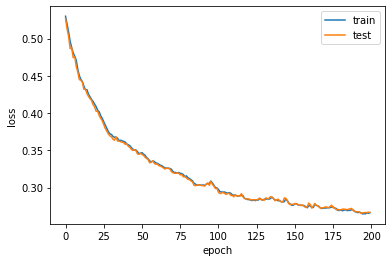

In [45]:
plt.plot(training.history['loss'], label='train');
plt.plot(training.history['val_loss'], label='test');
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend();

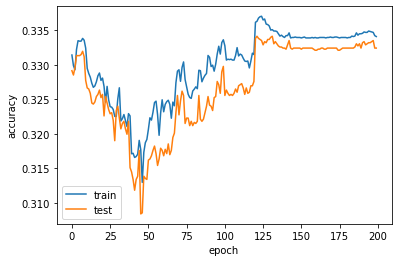

In [46]:
plt.plot(training.history['accuracy'], label='train');
plt.plot(training.history['val_accuracy'], label='test');
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend();